# S10 T01_Supervised Classification

## Nivell 0. Exploratory data analysis EDA

In [1]:
# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
import random

#preprocessing and analysis
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import xgboost as xgb
from xgboost import plot_tree
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
vuelos = pd.read_csv("DelayedFlights.csv")
vuelos.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Variables Description

- Year. year of the flight (stored as factor).

- Month. month of the flight (stored as factor).

- DayOfMonth. day of the month (1 to 31) (stored as integer).

- DayOfWeek. day of the week (stored as factor).

- DepTime. actual departure time (stored as float).

- CRSDepTime. scheduled departure time (stored as float).

- ArrTime. actual arrival time (stored as float).

- CRSArrTime. scheduled arrival time (stored as float).

- UniqueCarrier. carrier ID (stored as factor).

- FlightNum. flight number (stored as factor).

- TailNum. plane's tail number (stored as factor).

- ActualElapsedTime. actual elapsed time of the flight, in minutes (stored as integer).

- CRSElapsedTime. scheduled elapsed time of the flight, in minutes (stored as integer).

- AirTime. airborne time for the flight, in minutes (stored as integer).

- ArrDelay. arrival delay, in minutes (stored as integer).

- DepDelay. departure delay, in minutes (stored as integer).

- Origin. originating airport (stored as factor).

- Dest. destination airport (stored as factor).

- Distance. flight distance (stored as integer).

- TaxiIn. taxi time from wheels down to arrival at the gate, in minutes (stored as integer).

- TaxiOut. taxi time from departure from the gate to wheels up, in minutes (stored as integer).

- Cancelled. cancellation status (stored as logical).

- CancellationCode. cancellation code, if applicable (stored as factor).

- Diverted. diversion status (stored as logical).

- CarrierDelay. delay, in minutes, attributable to the carrier (stored integer).

- WeatherDelay. delay, in minutes, attributable to weather factors (stored as integer).

- NASDelay. delay, in minutes, attributable to the National Aviation System (stored as integer).

- SecurityDelay. delay, in minutes, attributable to security factors (stored as integer).

- LateAircraftDelay. delay, in minutes, attributable to late-arriving aircraft (stored as integer).

__Source__

__AirlineData87to08: Airline On-Time Performance Data__ https://docs.microsoft.com/en-us/machine-learning-server/r-reference/revoscaler/airlinedata87to08

In [3]:
df = vuelos.drop(["Unnamed: 0" ,"FlightNum", "Diverted","TailNum","Year", "Cancelled", "CancellationCode"], axis=1)
df.shape

(1936758, 23)

In [4]:
# Deleting rows with null data, based on ArrDelay variable
df.dropna(subset=["ArrDelay"], inplace=True)
df.isna().sum()
# We are going to do a comparison using the last five variables related to delay categories 

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

In [5]:
# Visualizing descriptive statistics
round(df[["Origin","Dest","Distance","ArrDelay","DepDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]].describe(), 2)

,Distance,ArrDelay,DepDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1928371.00,1928371.00,1928371.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,764.95,42.20,43.09,3.70,15.02,0.09,25.30
std,573.89,56.78,53.27,21.49,33.83,2.02,42.05
min,11.00,-109.00,6.00,0.00,0.00,0.00,0.00
25%,338.00,9.00,12.00,0.00,0.00,0.00,0.00
50%,606.00,24.00,24.00,0.00,2.00,0.00,8.00
75%,997.00,56.00,53.00,0.00,15.00,0.00,33.00
max,4962.00,2461.00,2467.00,1352.00,1357.00,392.00,1316.00


In [6]:
# Creating a new variable with the sum of all the five
# We verify that ArrDelay is exactly the same that the new variable created. 
# The sum of all the Delay categories are equal to ArrDelay
df["TotalDelay"] = df["CarrierDelay"]+df["WeatherDelay"]+df["NASDelay"]+df["SecurityDelay"]+df["LateAircraftDelay"]
    
df[["TotalDelay","ArrDelay"]].head()

,TotalDelay,ArrDelay
0,NaN,-14.0
1,NaN,2.0
2,NaN,14.0
3,34.0,34.0
4,NaN,11.0


In [7]:
# So, is not neccesary to delete NaN rows in all these variables.
# We just need to replace NaN for 0, in order to have a valid value.

df["CarrierDelay"].fillna(0, inplace = True)
df["WeatherDelay"].fillna(0, inplace = True)
df["NASDelay"].fillna(0, inplace = True)
df["SecurityDelay"].fillna(0, inplace = True)
df["LateAircraftDelay"].fillna(0, inplace = True)
df[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]]

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,32.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1936753,3.0,0.0,0.0,0.0,22.0
1936754,0.0,57.0,18.0,0.0,0.0
1936755,1.0,0.0,19.0,0.0,79.0
1936756,0.0,0.0,0.0,0.0,0.0


In [8]:
# Drop the variable we created for the comparison (TotalDelay)
del df['TotalDelay']

In [9]:
df.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Text(0.5, 1.0, 'Delay arrivals distribution')

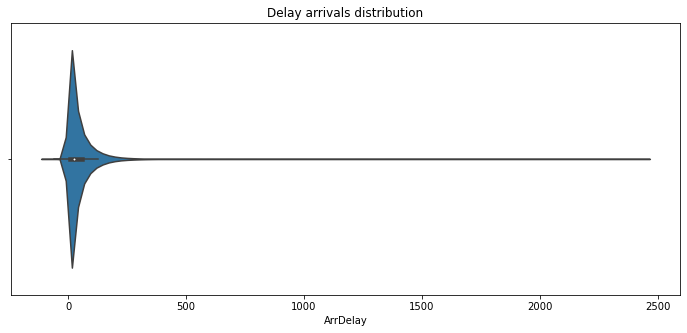

In [10]:
# Visualizing ArrDelay distribution
# The mean of delay is 42,20 min. but there are outliers that have a máx. of 2467 min.
f, ax = plt.subplots(figsize=(12, 5))
sns.violinplot(data=df, x='ArrDelay')
plt.title("Delay arrivals distribution")

__Transforming a variable Target depending on whether the flight was delay or not (ArrDelay> 0)__  

In [11]:
# Separating the data: 1 = Delay; 0 = no Delay
# We use the same criteria than in the last Sprint: 
# the Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later 

df['Target'] = df['ArrDelay'].apply(lambda x: 1 if x >= 15 else 0).astype(int)

In [12]:
# We use nomalize =True to know the percentages of values
df.Target.value_counts (normalize = True)

1    0.646913
0    0.353087
Name: Target, dtype: float64

In [13]:
df.Target.value_counts().sort_index()

0     680883
1    1247488
Name: Target, dtype: int64

Split the sample into 5.000 observations that is more easy to manage

In [14]:
df2 = df.sample(n = 5000, random_state = 123)
df2.shape

(5000, 24)

In [15]:
df2.Target.value_counts().sort_index()

0    1772
1    3228
Name: Target, dtype: int64

<ipython-input-16-ef8a47327153>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corrmat, dtype=np.bool)


Text(0.5, 1.0, 'Correlation matrix')

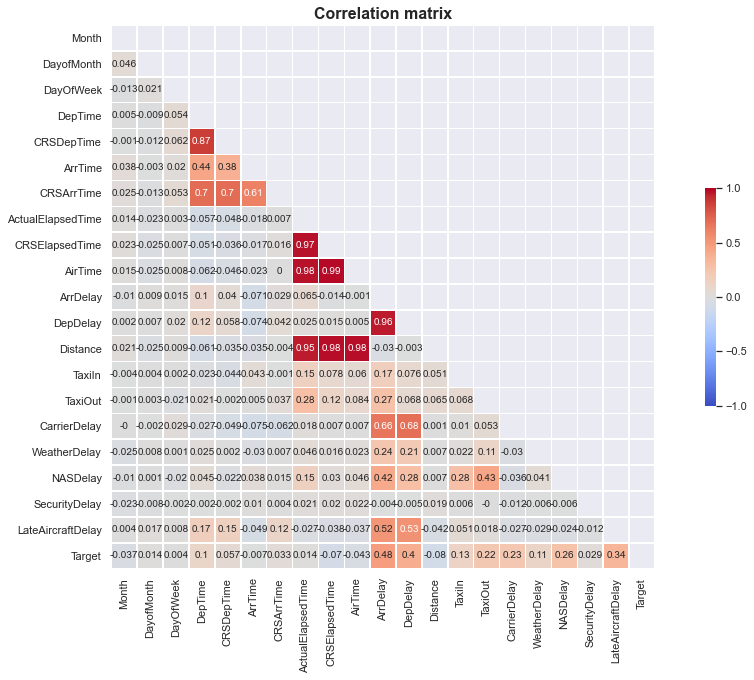

In [16]:
# Correlation matrix show us if two variables have a linear relationship and the strength of that relationship.
sns.set_theme()
corrmat = round(df2.corr(),3)
f, ax = plt.subplots(figsize=(18, 10))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(corrmat, 
                      mask = mask,
                      square =True,
                      linewidths = .5,
                      ax=ax,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10},
                      )
plt.title("Correlation matrix", fontsize=16, fontweight="bold")

## Nivell 1. Exercici 1. Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

The first time I try with the group of variables above, the result was a 1 of Accuracy, 1 of Precision and 1 of Recall.
So, in order to have different results and in order to avoid overfitting, we change the variables taking out all the Delay-related variables.

__Logistic Regression__

In [17]:
# Just using variables related with time
features = ['Month', 'DepTime', 'CRSElapsedTime','ArrTime', 'DepDelay' , 'AirTime', 'Distance']
X = df2[features] # Features
y = df2.Target # Target variable

In [18]:
# spiting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
#scaling the values
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# fit the model
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [21]:
logreg_matrix = metrics.confusion_matrix(y_test, y_pred)
logreg_matrix

array([[356,  68],
       [ 79, 747]], dtype=int64)

The confusion matrix shows a 2*2 matrix, because this model is binary classification. 

The order is : [True Negative, False Positive],[False Negative, True Positive] or [TN, FP],[FN,TP].

A good model is one which has high TP and TN rates, while low FP and FN rates
In the output, 356 and 747 are actual predictions, and 79 and 68 are incorrect predictions.

Text(0.5, 320.8, 'Predicted label')

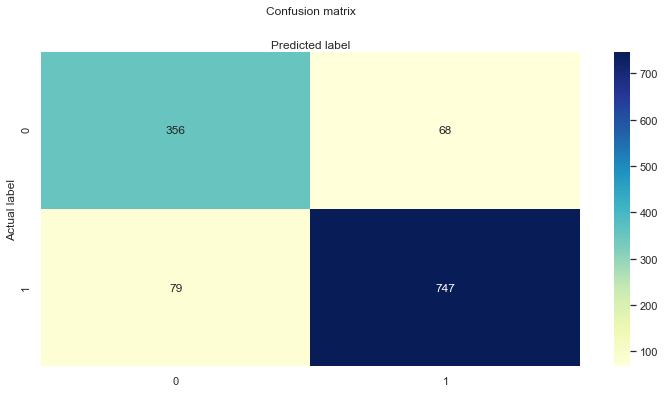

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(10, 5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(logreg_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1 )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8824
Precision: 0.9165644171779141
Recall: 0.9043583535108959


Accuracy comes out to 0.88, or 88%. In the 88% of cases the model make great predictions.
The Precision measures the percentage of delayed flights that were correctly classified, in this case is a 91% 

Receiver Operating Characteristic(ROC curve)

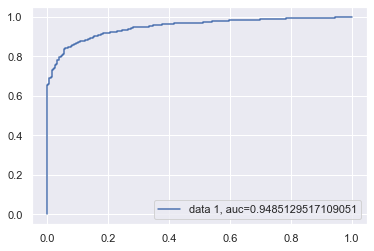

In [25]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The AUC is 95%, that is equivalent to the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance

__K – Nearest Neightbours__

In [26]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)

In [27]:
print('Accuracy KNN model:',round(metrics.accuracy_score(y_test, y_predknn),2)*100,'%')

Accuracy KNN model: 76.0 %


In [28]:
#Confusion matrix
knn_matrix = metrics.confusion_matrix(y_test, y_predknn)
knn_matrix

array([[345,  79],
       [217, 609]], dtype=int64)

Text(0.5, 320.8, 'Predicted label')

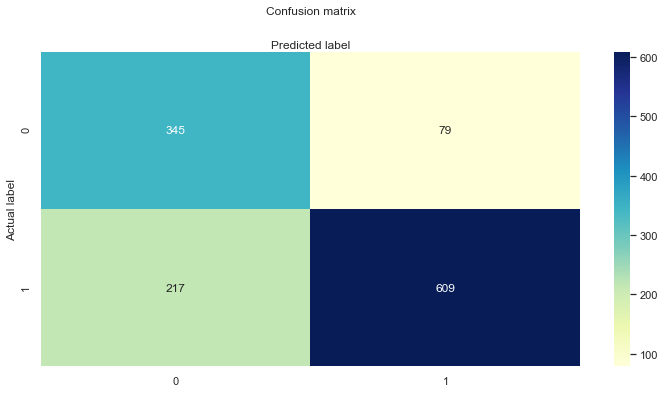

In [29]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(10, 5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(knn_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1 )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predknn))
print("Precision:",metrics.precision_score(y_test, y_predknn))
print("Recall:",metrics.recall_score(y_test, y_predknn))

Accuracy: 0.7632
Precision: 0.8851744186046512
Recall: 0.7372881355932204


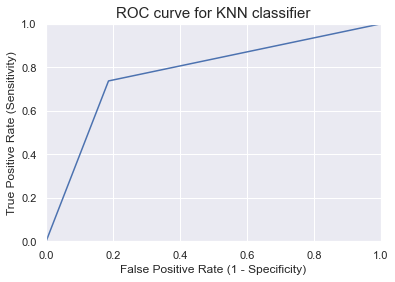

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predknn)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for KNN classifier', fontsize = 15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 12)
plt.grid(True)

__Decision tree classifier__

In [32]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_preddtc = dtc.predict(X_test)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_preddtc))

Accuracy: 0.7944


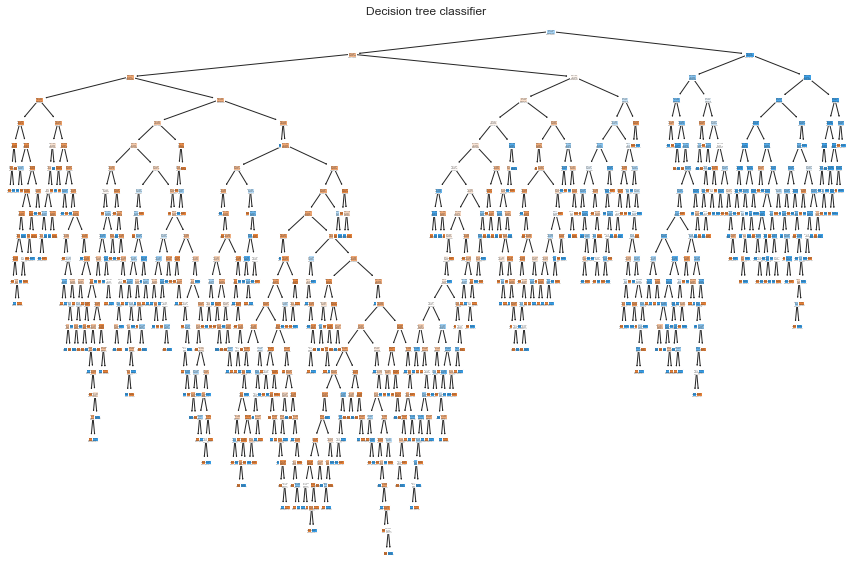

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(dtc, filled=True)
plt.title("Decision tree classifier")
plt.show(); 

In [35]:
dtcmatrix = metrics.confusion_matrix(y_test, y_preddtc)
dtcmatrix

array([[296, 128],
       [129, 697]], dtype=int64)

Text(0.5, 320.8, 'Predicted label')

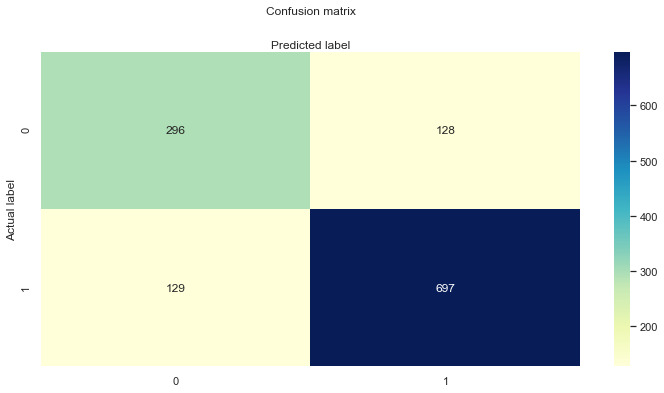

In [36]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(10, 5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(dtcmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1 )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_preddtc))
print("Precision:",metrics.precision_score(y_test, y_preddtc))
print("Recall:",metrics.recall_score(y_test, y_preddtc))

Accuracy: 0.7944
Precision: 0.8448484848484848
Recall: 0.8438256658595642


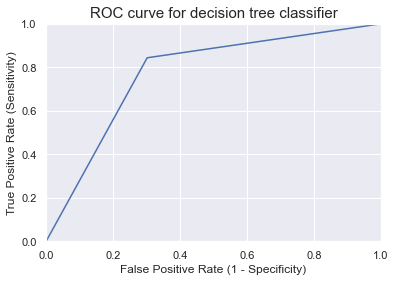

In [38]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_preddtc)

plt.plot(fpr2, tpr2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for decision tree classifier', fontsize = 15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 12)
plt.grid(True)

__XGBoost classifier__

In [39]:
model4 = xgb.XGBClassifier()
model4.fit(X_train,y_train)

C:\Users\nuyan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
_pred = xgb.predict(X_test)
predictions = [round(value) for value in _pred]

AttributeError: module 'xgboost' has no attribute 'predict'

Finally, I have repeated problems with the XBBoost classification, as we can see above.

So, I decide to try with SVC classification.

__Suport vector classification__

In [41]:
svclass = svm.SVC()
svclass.fit(X_train, y_train)
y_predsvc = svclass.predict(X_test)

In [42]:
svcmatrix = metrics.confusion_matrix(y_test, y_predsvc)
svcmatrix

array([[372,  52],
       [108, 718]], dtype=int64)

Text(0.5, 320.8, 'Predicted label')

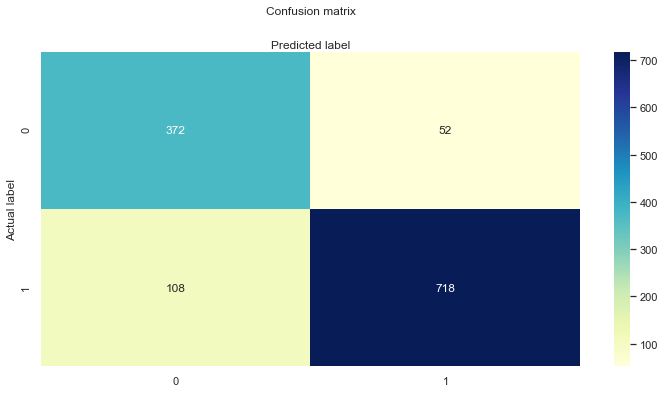

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(10, 5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(svcmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1 )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predsvc))
print("Precision:",metrics.precision_score(y_test, y_predsvc))
print("Recall:",metrics.recall_score(y_test, y_predsvc))

Accuracy: 0.872
Precision: 0.9324675324675324
Recall: 0.8692493946731235


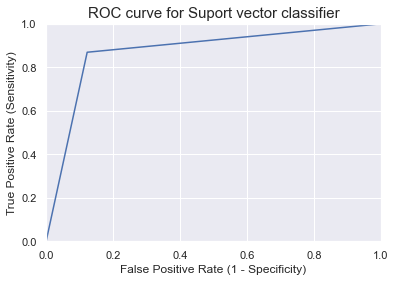

In [120]:
fpr3, tpr3, thresholds = metrics.roc_curve(y_test, y_predsvc)

plt.plot(fpr3, tpr3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Suport vector classifier', fontsize = 15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 12)
plt.grid(True)

## Nivell 1. Exercici 2. Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

__Accuracy__

In [46]:
print('Accuracy Logistic regression model:',round(metrics.accuracy_score(y_test, y_pred),2)*100,'%')
print('Accuracy KNN model:',round(metrics.accuracy_score(y_test, y_predknn),2)*100,'%')
print('Accuracy decision tree classifier:',round(metrics.accuracy_score(y_test, y_preddtc),2)*100,'%')
print('Accuracy Support Vector machine classifier:',round(metrics.accuracy_score(y_test, y_predsvc),2)*100,'%')

Accuracy Logistic regression model: 88.0 %
Accuracy KNN model: 76.0 %
Accuracy decision tree classifier: 79.0 %
Accuracy Support Vector machine classifier: 87.0 %


__Precision__

In [47]:
print("Precision Logistic regression model:", round(metrics.precision_score(y_test, y_pred),2)*100,'%')
print("Precision KNN model:", round(metrics.precision_score(y_test, y_predknn),2)*100,'%')
print("Precision decision tree classifier:", round(metrics.precision_score(y_test, y_preddtc),2)*100,'%')
print("Precision Support Vector machine classifier:", round(metrics.precision_score(y_test, y_predsvc),2)*100,'%')

Precision Logistic regression model: 92.0 %
Precision KNN model: 89.0 %
Precision decision tree classifier: 84.0 %
Precision Support Vector machine classifier: 93.0 %


__Recall__

In [48]:
print("Recall Logistic regression model:", round(metrics.recall_score(y_test, y_pred),2)*100,'%')
print("Recall KNN model:", round(metrics.recall_score(y_test, y_predknn),2)*100,'%')
print("Recall decision tree classifier:", round(metrics.recall_score(y_test, y_preddtc),2)*100,'%')
print("Recall Support Vector machine classifier:", round(metrics.recall_score(y_test, y_predsvc),2)*100,'%')

Recall Logistic regression model: 90.0 %
Recall KNN model: 74.0 %
Recall decision tree classifier: 84.0 %
Recall Support Vector machine classifier: 87.0 %


__Confidence matrix__

In [49]:
print('Matrix logReg:',logreg_matrix)
print('Matrix KNN model:',knn_matrix)
print('Matrix Decision tree classifier:',dtcmatrix)
print('Matrix SVM model:',svcmatrix)

Matrix logReg: [[356  68]
 [ 79 747]]
Matrix KNN model: [[345  79]
 [217 609]]
Matrix Decision tree classifier: [[296 128]
 [129 697]]
Matrix SVM model: [[372  52]
 [108 718]]


__F1 score__

In [50]:
# F1 scores classification
f1_logreg = f1_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_predknn)
f1_dtc = f1_score(y_test, y_preddtc)
f1_svc = f1_score(y_test, y_predsvc)

In [51]:
print("F1 score logistic regression: ", f1_logreg)
print("F1 score knn model: ", f1_knn)
print("F1 score decision tree classification: ", f1_dtc)
print("F1 score Support Vector machine: ", f1_svc) 

F1 score logistic regression:  0.910420475319927
F1 score knn model:  0.8044914134742404
F1 score decision tree classification:  0.8443367655966082
F1 score Support Vector machine:  0.899749373433584


*F1 score is considered a better indicator of the classifier’s performance than the regular accuracy measure. In this case, the f1_scores are higher than the accuracy ones.*

## Nivell 1. Exercici 3. Entrena’ls utilitzant els diferents paràmetres que admeten.

__Logistic classifier__

In [52]:
# penalty: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
# dual: bool, default=False
# tol: float, default=1e-4
# C: float, default=1.0
# fit_intercept: bool, default=True
# intercept_scaling: float, default=1
# class_weight: dict or ‘balanced’, default=None
# random_state: int, RandomState instance, default=None
# solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

logreg2 = LogisticRegression(class_weight='balanced',
                           random_state = 100,
                           multi_class='multinomial',
                            solver= 'newton-cg'
                            )
# fit the model with data
logreg2.fit(X_train, y_train)

y_pred2 = logreg2.predict(X_test)

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

Accuracy: 0.8792
Precision: 0.9518072289156626
Recall: 0.860774818401937


The modifications done has effect in the precision (rise) but the recall is a little low. Almost no changes in the accuracy.

__K-Nearest Neighbors__

In [54]:
# n_neighbors:int, default=5
# weights: {‘uniform’, ‘distance’} or callable, default=’uniform’
# algorithm: {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
# leaf_size: int, default=30
# metric_params: dict, default=None

knn2 = KNeighborsClassifier(n_neighbors=3,
                           weights ='distance',
                           algorithm = 'brute',
                           leaf_size = 10,
                           
                           )
knn2.fit(X_train, y_train)
y_predknn2 = knn.predict(X_test)

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predknn2))
print("Precision:",metrics.precision_score(y_test, y_predknn2))
print("Recall:",metrics.recall_score(y_test, y_predknn2))

Accuracy: 0.7632
Precision: 0.8851744186046512
Recall: 0.7372881355932204


All the parameters used have no changes in the statistics values.

__Decision tree classifier__

In [56]:
# criterion: {“gini”, “entropy”}, default=”gini”
# splitter{“best”, “random”}, default=”best”
# class_weight: dict, list of dict or “balanced”, default=None
# max_depth int, default=Ninguno
# max_features: int, float o {"auto", "sqrt", "log2"}, default=None
dtc2 = DecisionTreeClassifier(criterion = 'entropy',
                              splitter = 'random',
                              class_weight = 'balanced',
                              max_depth = 3,
                              max_features = 'sqrt'
                            )
dtc2 = dtc.fit(X_train,y_train)
y_preddtc2 = dtc.predict(X_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_preddtc2))
print("Precision:",metrics.precision_score(y_test, y_preddtc2))
print("Recall:",metrics.recall_score(y_test, y_preddtc2))

Accuracy: 0.8016
Precision: 0.8533007334963325
Recall: 0.8450363196125908


The parameters used have a little change in all the values The Accuracy changes from 79% to 80%.

__Support Vector Machine__

In [58]:
# kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
# break_ties: bool, default=False
svclass2 = svm.SVC(kernel = 'poly',
                   class_weight = 'balanced',
                   break_ties = 'bool',
                   random_state = 42
                  )
svclass2.fit(X_train, y_train)
y_predsvc2 = svclass2.predict(X_test)

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predsvc2))
print("Precision:",metrics.precision_score(y_test, y_predsvc2))
print("Recall:",metrics.recall_score(y_test, y_predsvc2))

Accuracy: 0.7896
Precision: 0.9182763744427934
Recall: 0.7481840193704601


The parameters used, specially the 'poly' kernel, reduce the values of the three statistics.

## Nivell 1. Exercici 4. Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

__Implementing cross validation__

In [60]:
score_logreg = cross_val_score(logreg, X, y, cv=5, scoring='accuracy', n_jobs = 2)
score_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy', n_jobs = 2)
score_dtc = cross_val_score(dtc, X, y, cv=5, scoring='accuracy', n_jobs = 2)
score_svc = cross_val_score(svclass, X, y, cv=5, scoring='accuracy', n_jobs = 2)

In [61]:
print('Logistic regression 5-Fold Accuracy:{}'.format(round(score_logreg.mean(),4)))
print('K Neighbours 5-Fold Accuracy:{}'.format(round(score_knn.mean(),4 )))
print('Decision tree  5-Fold Accuracy:{}'.format(round(score_dtc.mean(), 4)))
print('SVC 5-Fold Accuracy:{}'.format(round(score_svc.mean(), 4)))

Logistic regression 5-Fold Accuracy:0.8732
K Neighbours 5-Fold Accuracy:0.6668
Decision tree  5-Fold Accuracy:0.7918
SVC 5-Fold Accuracy:0.6492


The cross-validation gives high accuracy to the logistic regression and the decision tree model.

## Nivell 2. Exercici 5. Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

Before to try with any other combination of variables, just to say that we don't use the Delay-related variables because the main metric to evaluate the model, accuracy, gives a value of 1. 
As we see in the EDA exercise, the sum of all together are equal to ArrDelay. Here the excersise (just to verify).

In [111]:
features22 = ['Month', 'DayofMonth','AirTime', 'Distance' ,'TaxiIn', 'TaxiOut']
X = df2[features22] # Features
y = df2.Target # Target variable

In [112]:
# spiting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [113]:
#scaling the values
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
#LogisticRegression
logicReg22 = LogisticRegression()
logicReg22.fit(X_train, y_train)
y_pred22 = logicReg22.predict(X_test)

#KNN classifier
knn22 = KNeighborsClassifier(n_neighbors=6)
knn22.fit(X_train, y_train)
y_predknn22 = knn22.predict(X_test)

#Decision tree classifier
dtc22 = DecisionTreeClassifier()
dtc22 = dtc22.fit(X_train,y_train)
y_preddtc22 = dtc22.predict(X_test)

#Suport vector classifier
model22 = svm.SVC()
model22.fit(X_train, y_train)
y_predsvc22 = model22.predict(X_test)

In [115]:
print('Accuracy Logistic regression model:',round(metrics.accuracy_score(y_test, y_pred22),2)*100,'%')
print('Accuracy KNN model:',round(metrics.accuracy_score(y_test, y_predknn22),2)*100,'%')
print('Accuracy decision tree classifier:',round(metrics.accuracy_score(y_test, y_preddtc22),2)*100,'%')
print('Accuracy Support Vector Machine model:',round(metrics.accuracy_score(y_test, y_predsvc22),2)*100,'%')

Accuracy Logistic regression model: 68.0 %
Accuracy KNN model: 56.00000000000001 %
Accuracy decision tree classifier: 56.99999999999999 %
Accuracy Support Vector Machine model: 67.0 %


In [116]:
# F1 scores classification
f1_logreg22 = f1_score(y_test, y_pred22)
f1_knn22 = f1_score(y_test, y_predknn22)
f1_dtc22 = f1_score(y_test, y_preddtc22)
f1_svc22 = f1_score(y_test, y_predsvc22)

In [117]:
print("F1 score Logistic regression: ", f1_logreg22)
print("F1 score KNN: ", f1_knn22)
print("F1 score Decision tree: ", f1_dtc22) 
print("F1 score Support Vector machine: ", f1_svc22)

F1 score Logistic regression:  0.7831260140616549
F1 score KNN:  0.644023514043109
F1 score Decision tree:  0.6666666666666667
F1 score Support Vector machine:  0.7884615384615384


In [119]:
# Comparison with the first models done
print("F1 score logistic regression: ", f1_logreg)
print("F1 score knn model: ", f1_knn)
print("F1 score decision tree classification: ", f1_dtc)
print("F1 score Support Vector machine: ", f1_svc)

F1 score logistic regression:  0.910420475319927
F1 score knn model:  0.8044914134742404
F1 score decision tree classification:  0.8443367655966082
F1 score Support Vector machine:  0.899749373433584


The F1 score gives a logistic regression and the Support Vector Machine, the hight values validating as the best models with the variables used.

The comparison with the first models says that we could not improve the metrics that evaluate the classification models. In the first case we have the best metrics, specially for Logistic regression and Support vertor machine.


## Nivell 3. Exercici 6. No utilitzis la variable DepDelay a l’hora de fer prediccions

I take into account this point in all the exercises.